# X03: Introduction to Statistics

Before we do any analysis or use any advanced techniques like machine learning, it's important to have a grasp of statistics and some of the functions that are available to us within Python. 

Here we are going to look at:

- Item frequency tables
- Histograms
- Mean, median, standard deviation etc
- Skew
- p-values
- Chi squared

Which are just a few of the statistical functions that are available to us in the stats library within scipy.

So first we'll load scipy.stats, numpy (so we can use some ot its mathematical functions) and matplotlib (so we can plot our results)

In [2]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We'll create a random integer uniform distribution, a random normal distribution and a random poisson distribution to look at first of all.

In [3]:
uniform = np.random.random_integers(10,size=10000)
normal = np.random.randn(10000)
poisson = np.random.poisson(1,10000)

We can then create a item frequency table of these distributions using the stats.itemfreq function in scipy

In [4]:
sps.itemfreq(uniform)

array([[   1, 1010],
       [   2,  973],
       [   3, 1006],
       [   4,  992],
       [   5, 1005],
       [   6,  966],
       [   7, 1028],
       [   8,  965],
       [   9, 1023],
       [  10, 1032]])

This has given us a table of all the numbers in the distribution and the number of times they appear in the array "uniform".

Another way we can look at these distributions is using a histogram, which we can do within scipy, but we're going to do it straight into matplotlib

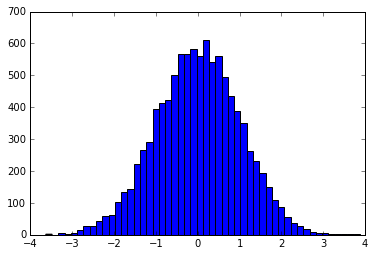

In [9]:
n, bins, patches = plt.hist(normal, bins=50)    #n is the number of items in each bin, bins gives the bin edges

Which we can also normalise to 1

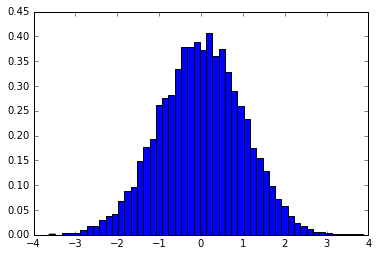

In [10]:
n, bins, patches = plt.hist(normal, bins=50, normed=True)

And plot the cumulative distribution

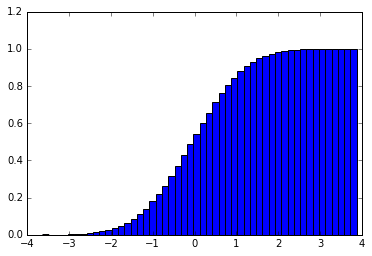

In [11]:
n, bins, patches = plt.hist(normal, bins=50, normed=True, cumulative=True)

We can also look at some stats of this distribution, such as the mean, the median and the standard deviation using numpy

In [16]:
np.mean(normal)

0.00023238530555500745

In [17]:
np.median(normal)

0.0098224699474755931

In [18]:
np.std(normal)

1.0029457351448781

This is one standard deviation, so we'd expect 68% of all of our points to lie within the range 

mean - std and mean + std

If we wanted to know where 95% of all our points lie we would multiply this by two, so the range is 

mean - 2 x std to mean + 2 x std

Using scipy we can find the skew (how assymetric the distribution is)

In [ ]:
sps.skew(normal)

All these stats quantify what our distribution looks like, but the best way to quantify this is to try to find a generalised function that fits the distribution well. To find out how well our distribution fits we can use variuos measures of goodness of fit, but here we're going to focus on chi^2, which is just calculated using the following equation:

$$\chi^2 = \Sigma ((data - theory)/(variance))$$

Where the variance is std^2. This is the expected error on any measurement, so for a single data point where the data and the theory were within the measurement errors we'd expect chi^2<=1. This means for our 50 bins (data points) above we'd expect chi^2<=50.

So let's try to fit a normal distribution to our "normal" array.

First we need to define the type of function we want to fit.

In [13]:
def normalfunction(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

Then we need to fit this Gaussian using scipy

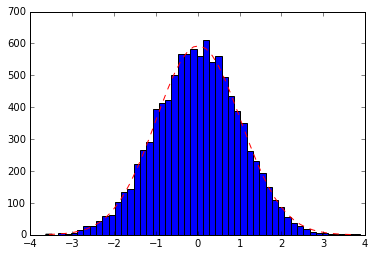

In [40]:
from scipy.optimize import curve_fit

#Build our histogram again
n, bins, patches = plt.hist(normal, bins=50)   
#Find our bin centres to use as our x values in the fit
bincentres=bins[0:(len(bins)-1)]+np.diff(bins)/2

#Fit the normal distribution function we created
coefficients, covariance = curve_fit(normalfunction, bincentres, n)
#Find the y values of our fitted function
fittedFunction = normalfunction(bincentres,coefficients[0],coefficients[1],coefficients[2])  
#Plot our fitted function over the top of our histogram to see how it looks
plt.plot(bincentres, fittedFunction, 'r--', linewidth=1)

Now we can check how good that fit is using chi^2 and the p-value

In [43]:
sps.chisquare(n, fittedFunction) #The statistic quoted is the chi^2

Power_divergenceResult(statistic=49.642671511145934, pvalue=0.44750267718076958)

An excellent fit!